# Importing Data

In [29]:
import pandas as pd
import numpy as np
df = pd.read_excel("/Users/sunitjadeja/Desktop/TISS All Subject/Economic Impact Evalution/ie_ EX.xls")
df.columns
# print (df.dtypes)

Index(['householdid', 'block', 'village', 'worl', 'perf', 'hhsize', 'age',
       'edn', 'shg', 'vp_b', 'pr_b', 'mg_b', 'wof_b', 'vp_e', 'pr_e', 'apl_e',
       'ry', 'basey', 'mign', 'migr', 'migmn', 'land', 'iricost', 'ownlc',
       'hirlc', 'inputc', 'vegp', 'totalp', 'vegshare', 'nrega', 'iay', 'aay',
       'lvst', 'aset', 'ncop', 'ncop5', 'mcop', 'mcop5', 'losv', 'losv5',
       'losp', 'losp5', 'lbsy', 'meala', 'lpsd', 'lmr', 'bigr', 'smalr',
       'marg', 'smal', 'smed', 'medi'],
      dtype='object')

# Multiplicative Method 
Introducing Delta Y & Interaction Effect (Performance in WORL * WORL Treatment & Control Group)

In [33]:
df["delta_y"]=df["ry"]-df["basey"]
df
df["interaction"]=df["worl"]*df["perf"]
df
df["log_y"]=np.log (df["delta_y"])
df

,householdid,block,village,worl,perf,hhsize,age,edn,shg,vp_b,...,lmr,bigr,smalr,marg,smal,smed,medi,delta_y,interaction,log_y
0,BAA01,Agalpur,Asurmunda,1,1,6,35,4,1,0,...,9.615872,0,0,1,0,0,0,19208,1,9.863082
1,BAA02,Agalpur,Asurmunda,1,1,6,33,5,1,0,...,9.903538,0,0,1,0,0,0,18400,1,9.820106
2,BAA03,Agalpur,Asurmunda,1,1,6,38,0,1,0,...,0.000000,0,0,1,0,0,0,19164,1,9.860789
3,BAA04,Agalpur,Asurmunda,1,1,5,45,7,1,0,...,10.778977,0,2,0,1,0,0,37608,1,10.534972
4,BAA05,Agalpur,Asurmunda,1,1,2,62,0,1,0,...,0.000000,4,0,1,0,0,0,19819,1,9.894396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,BTT56,Bangomunda,Terekela,1,0,10,80,0,1,1,...,10.308986,0,0,1,0,0,0,20580,0,9.932075
796,BTT57,Bangomunda,Terekela,1,0,3,70,0,1,0,...,0.000000,2,0,1,0,0,0,24016,0,10.086476
797,BTT58,Bangomunda,Terekela,1,0,2,65,4,1,0,...,0.000000,0,0,1,0,0,0,15720,0,9.662689
798,BTT59,Bangomunda,Terekela,1,0,3,60,0,1,0,...,0.000000,0,0,1,0,0,0,21208,0,9.962134


In [31]:
# What is the impact of WORL
# Why do i observe it or how will you explain 
# Impact of WORL
# PSM, DID & Multiplicative dummy

In [4]:
worl_treatment_group=df[df["worl"].isin(["1"])]
# print(worl_treatment_group)
good_end=worl_treatment_group[worl_treatment_group["perf"].isin(["1"])]
print(good_end)

worl_control_group=df[df["worl"].isin(["0"])]
bad_end=worl_control_group[worl_control_group["perf"].isin(["0"])]
print(bad_end)

    householdid      block      village  worl  perf  hhsize  age  edn  shg  \
0         BAA01    Agalpur    Asurmunda     1     1       6   35    4    1   
1         BAA02    Agalpur    Asurmunda     1     1       6   33    5    1   
2         BAA03    Agalpur    Asurmunda     1     1       6   38    0    1   
3         BAA04    Agalpur    Asurmunda     1     1       5   45    7    1   
4         BAA05    Agalpur    Asurmunda     1     1       2   62    0    1   
..          ...        ...          ...   ...   ...     ...  ...  ...  ...   
704       BPP46  Patnagarh  Pandiripani     1     1       8   60    0    1   
705       BPP47  Patnagarh  Pandiripani     1     1       5   49    3    1   
706       BPP48  Patnagarh  Pandiripani     1     1      10   35    0    1   
707       BPP49  Patnagarh  Pandiripani     1     1       1   60    0    1   
708       BPP50  Patnagarh  Pandiripani     1     1      10   40    7    1   

     vp_b  ...  lpsd        lmr  bigr  smalr  marg  smal  smed 

In [10]:
hetero_data=[good_end, bad_end]
data=pd.concat(hetero_data,axis=0)
data
#print (data.isnull().sum())
# sns.heatmap(df.isnull(),cbar=True)

,householdid,block,village,worl,perf,hhsize,age,edn,shg,vp_b,...,lpsd,lmr,bigr,smalr,marg,smal,smed,medi,delta_y,interaction
0,BAA01,Agalpur,Asurmunda,1,1,6,35,4,1,0,...,0,9.615872,0,0,1,0,0,0,19208,1
1,BAA02,Agalpur,Asurmunda,1,1,6,33,5,1,0,...,0,9.903538,0,0,1,0,0,0,18400,1
2,BAA03,Agalpur,Asurmunda,1,1,6,38,0,1,0,...,0,0.000000,0,0,1,0,0,0,19164,1
3,BAA04,Agalpur,Asurmunda,1,1,5,45,7,1,0,...,0,10.778977,0,2,0,1,0,0,37608,1
4,BAA05,Agalpur,Asurmunda,1,1,2,62,0,1,0,...,0,0.000000,4,0,1,0,0,0,19819,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,BGS46,Gudvella,Sanadangar Gaon,0,0,5,55,3,1,1,...,0,10.596660,0,0,1,0,0,0,24952,0
555,BGS47,Gudvella,Sanadangar Gaon,0,0,5,48,4,1,1,...,0,9.903538,2,4,1,0,0,0,28696,0
556,BGS48,Gudvella,Sanadangar Gaon,0,0,13,50,5,1,0,...,0,0.000000,2,2,0,1,0,0,38672,0
557,BGS49,Gudvella,Sanadangar Gaon,0,0,2,58,4,1,0,...,0,0.000000,0,4,1,0,0,0,22760,0


In [41]:
# import statsmodels.api as sm
# y_ry=data[["delta_y"]]
# x_ry=data[["worl","interaction"]]
# X1_ry=sm.add_constant(x_ry)
# #Modelling using OLS least sqaure method
# model_ry=sm.OLS(y_ry,X1_ry)
# fitted1_ry=model_ry.fit()
# fitted1_ry.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                delta_y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     3.301
Date:                Mon, 22 Nov 2021   Prob (F-statistic):             0.0700
Time:                        22:37:20   Log-Likelihood:                -4411.7
No. Observations:                 400   AIC:                             8827.
Df Residuals:                     398   BIC:                             8835.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.036e+04   1495.666     20.295      0.000    2.74e+04    3.33e+04
worl         1568.7983    863.523      1.817      0.070    -128.839    3266.436
interaction  1568.7983    863.523      1.817      0.070    -128.839    3266.436
==============================================================================
Omnibus:                       14.241   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.684
Skew:                           0.407   Prob(JB):                      0.00107
Kurtosis:                       2.600   Cond. No.                     3.38e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.2e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [5]:
import statsmodels.api as sm
y_ry=df[["delta_y"]]
x_ry=df[["worl","interaction"]]
X1_ry=sm.add_constant(x_ry)
#Modelling using OLS least sqaure method
model_ry=sm.OLS(y_ry,X1_ry)
fitted1_ry=model_ry.fit()
fitted1_ry.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                delta_y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     5.304
Date:                Tue, 30 Nov 2021   Prob (F-statistic):            0.00515
Time:                        23:27:04   Log-Likelihood:                -8829.0
No. Observations:                 800   AIC:                         1.766e+04
Df Residuals:                     797   BIC:                         1.768e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.905e+04   1064.247     27.296      0.000     2.7e+04    3.11e+04
worl         3095.2083   1373.936      2.253      0.025     398.247    5792.170
interaction  1347.4733   1228.886      1.096      0.273   -1064.762    3759.709
==============================================================================
Omnibus:                       32.651   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.129
Skew:                           0.480   Prob(JB):                     3.88e-08
Kurtosis:                       2.683   Cond. No.                         4.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
import statsmodels.api as sm
y_ry=df[["delta_y"]]
x_ry=df[["worl","interaction","smed","smal","aset","totalp","iricost","mign","medi","vp_b","lvst","pr_b"]]
X1_ry=sm.add_constant(x_ry)
#Modelling using OLS least sqaure method
model_ry=sm.OLS(y_ry,X1_ry)
fitted1_ry=model_ry.fit()
fitted1_ry.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                delta_y   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     35.53
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           4.67e-66
Time:                        09:20:55   Log-Likelihood:                -8661.1
No. Observations:                 800   AIC:                         1.735e+04
Df Residuals:                     787   BIC:                         1.741e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.546e+04   1210.605     12.766      0.000    1.31e+04    1.78e+04
worl           -7.2719   1208.527     -0.006      0.995   -2379.590    2365.047
interaction  4604.3014   1104.114      4.170      0.000    2436.944    6771.659
smed         5366.8080   2416.397      2.221      0.027     623.462    1.01e+04
smal         5522.5373   1388.479      3.977      0.000    2796.977    8248.098
aset            0.0068      0.002      3.905      0.000       0.003       0.010
totalp          0.1753      0.030      5.825      0.000       0.116       0.234
iricost         2.8784      0.928      3.102      0.002       1.057       4.700
mign         6769.2967    586.156     11.549      0.000    5618.683    7919.911
medi        -2.519e+04   5588.780     -4.508      0.000   -3.62e+04   -1.42e+04
vp_b         8984.5789   1245.787      7.212      0.000    6539.120    1.14e+04
lvst          366.5892     87.089      4.209      0.000     195.635     537.543
pr_b         5148.3030   1005.567      5.120      0.000    3174.393    7122.213
==============================================================================
Omnibus:                       19.927   Durbin-Watson:                   1.721
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.007
Skew:                           0.362   Prob(JB):                     2.74e-05
Kurtosis:                       3.323   Cond. No.                     5.28e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X2 = add_constant(x_ry)
pd.Series([variance_inflation_factor(X2.values, i) 
for i in range(X2.shape[1])], 
index=X2.columns)

const          4.00
worl           1.25
interaction    1.25
dtype: float64

In [42]:
data.corr()['delta_y']

worl           0.090690
perf           0.090690
hhsize         0.330265
age           -0.065323
edn           -0.064100
shg           -0.025716
vp_b           0.019410
pr_b           0.084703
mg_b          -0.077584
wof_b         -0.052098
vp_e          -0.006538
pr_e          -0.051746
apl_e          0.067178
ry             0.942757
basey          0.002582
mign           0.119133
migr           0.125905
migmn          0.099093
land           0.276261
iricost        0.266428
ownlc          0.357523
hirlc          0.301969
inputc         0.366015
vegp           0.126840
totalp         0.320785
vegshare       0.077721
nrega          0.167586
iay           -0.064377
aay            0.050815
lvst           0.262014
aset           0.251395
ncop           0.246331
ncop5         -0.158880
mcop           0.130140
mcop5          0.197412
losv           0.192309
losv5          0.303786
losp           0.134147
losp5          0.177331
lbsy           0.024836
meala          0.047601
lpsd          -0

In [51]:
# import statsmodels.api as sm
# y_ry=data[["delta_y"]]
# x_ry=data[["worl","interaction","smed","smal","aset","totalp","iricost","vegp","mign","medi","vp_b","lvst","pr_b","wof_b"]]
# X1_ry=sm.add_constant(x_ry)
# #Modelling using OLS least sqaure method
# model_ry=sm.OLS(y_ry,X1_ry)
# fitted1_ry=model_ry.fit()
# fitted1_ry.summary()

In [11]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from statsmodels.tools.tools import add_constant
# X2 = add_constant(x_ry)
# pd.Series([variance_inflation_factor(X2.values, i) 
# for i in range(X2.shape[1])], 
# index=X2.columns)

In [13]:
# import statsmodels.api as sm
# y_ry=data[["delta_y"]]
# x_ry=data[["worl","interaction","hhsize","smed","smal","aset","totalp","iricost","vegp","mign","medi","vp_b","lvst","pr_b"]]
# X1_ry=sm.add_constant(x_ry)
# #Modelling using OLS least sqaure method
# model_ry=sm.OLS(y_ry,X1_ry)
# fitted1_ry=model_ry.fit()
# fitted1_ry.summary()

In [12]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from statsmodels.tools.tools import add_constant
# X2 = add_constant(x_ry)
# pd.Series([variance_inflation_factor(X2.values, i) 
# for i in range(X2.shape[1])], 
# index=X2.columns)

In [7]:
import statsmodels.api as sm
y_ry=df[["delta_y"]]
x_ry=df[["worl","interaction","smed","smal","aset","totalp","iricost","mign","medi","vp_b","lvst","pr_b"]]
X1_ry=sm.add_constant(x_ry)
#Modelling using OLS least sqaure method
model_ry=sm.OLS(y_ry,X1_ry)
fitted1_ry=model_ry.fit()
fitted1_ry.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                delta_y   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     35.53
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           4.67e-66
Time:                        23:27:13   Log-Likelihood:                -8661.1
No. Observations:                 800   AIC:                         1.735e+04
Df Residuals:                     787   BIC:                         1.741e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.546e+04   1210.605     12.766      0.000    1.31e+04    1.78e+04
worl           -7.2719   1208.527     -0.006      0.995   -2379.590    2365.047
interaction  4604.3014   1104.114      4.170      0.000    2436.944    6771.659
smed         5366.8080   2416.397      2.221      0.027     623.462    1.01e+04
smal         5522.5373   1388.479      3.977      0.000    2796.977    8248.098
aset            0.0068      0.002      3.905      0.000       0.003       0.010
totalp          0.1753      0.030      5.825      0.000       0.116       0.234
iricost         2.8784      0.928      3.102      0.002       1.057       4.700
mign         6769.2967    586.156     11.549      0.000    5618.683    7919.911
medi        -2.519e+04   5588.780     -4.508      0.000   -3.62e+04   -1.42e+04
vp_b         8984.5789   1245.787      7.212      0.000    6539.120    1.14e+04
lvst          366.5892     87.089      4.209      0.000     195.635     537.543
pr_b         5148.3030   1005.567      5.120      0.000    3174.393    7122.213
==============================================================================
Omnibus:                       19.927   Durbin-Watson:                   1.721
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.007
Skew:                           0.362   Prob(JB):                     2.74e-05
Kurtosis:                       3.323   Cond. No.                     5.28e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X2 = add_constant(x_ry)
pd.Series([variance_inflation_factor(X2.values, i) 
for i in range(X2.shape[1])], 
index=X2.columns)

const          7.776131
worl           1.453025
interaction    1.515996
smed           1.644655
smal           1.468499
aset           1.740649
totalp         2.578503
iricost        1.266694
mign           1.117925
medi           1.640695
vp_b           1.317548
lvst           1.129693
pr_b           1.299025
dtype: float64

In [9]:
#import statsmodels.api as sm
# y_ry=data[["delta_y"]]
# x_ry=data[["worl","interaction","smed","smal","aset","totalp","iricost","vegp","mign","medi","vp_b","lvst","pr_b","lbsy","wof_b"]]
# X1_ry=sm.add_constant(x_ry)
# #Modelling using OLS least sqaure method
# model_ry=sm.OLS(y_ry,X1_ry)
# fitted1_ry=model_ry.fit()
# fitted1_ry.summary()

In [2]:
df["delta_y"]=df["ry"]-df["basey"]
df

,householdid,block,village,worl,perf,hhsize,age,edn,shg,vp_b,...,meala,lpsd,lmr,bigr,smalr,marg,smal,smed,medi,delta_y
0,BAA01,Agalpur,Asurmunda,1,1,6,35,4,1,0,...,2,0,9.615872,0,0,1,0,0,0,19208
1,BAA02,Agalpur,Asurmunda,1,1,6,33,5,1,0,...,2,0,9.903538,0,0,1,0,0,0,18400
2,BAA03,Agalpur,Asurmunda,1,1,6,38,0,1,0,...,2,0,0.000000,0,0,1,0,0,0,19164
3,BAA04,Agalpur,Asurmunda,1,1,5,45,7,1,0,...,2,0,10.778977,0,2,0,1,0,0,37608
4,BAA05,Agalpur,Asurmunda,1,1,2,62,0,1,0,...,2,0,0.000000,4,0,1,0,0,0,19819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,BTT56,Bangomunda,Terekela,1,0,10,80,0,1,1,...,3,0,10.308986,0,0,1,0,0,0,20580
796,BTT57,Bangomunda,Terekela,1,0,3,70,0,1,0,...,3,0,0.000000,2,0,1,0,0,0,24016
797,BTT58,Bangomunda,Terekela,1,0,2,65,4,1,0,...,2,0,0.000000,0,0,1,0,0,0,15720
798,BTT59,Bangomunda,Terekela,1,0,3,60,0,1,0,...,3,0,0.000000,0,0,1,0,0,0,21208


In [3]:
df.block.unique()

array(['Agalpur', 'Bongomunda', 'Bangomunda', 'Gudvella', 'Patnagarh'],
      dtype=object)

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

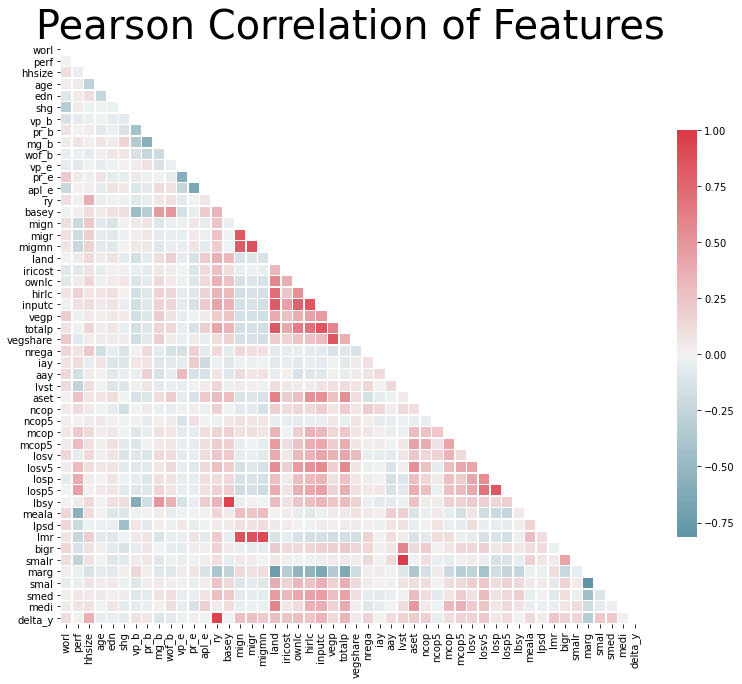

In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
X=df.iloc[:,3:54]
corr = X.corr()
corr
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 15))
plt.title('Pearson Correlation of Features', y=1, size=40)
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})




In [5]:
df.corr()['delta_y']

worl        0.107921
perf        0.011839
hhsize      0.359760
age        -0.045394
edn        -0.029714
shg        -0.067207
vp_b        0.083966
pr_b        0.070653
mg_b       -0.107581
wof_b      -0.076933
vp_e       -0.019919
pr_e        0.016406
apl_e      -0.000998
ry          0.938217
basey      -0.013279
mign        0.273174
migr        0.266665
migmn       0.214431
land        0.264868
iricost     0.243830
ownlc       0.282781
hirlc       0.238075
inputc      0.323626
vegp        0.131291
totalp      0.322054
vegshare    0.051504
nrega       0.159378
iay         0.013482
aay         0.112939
lvst        0.166535
aset        0.211493
ncop        0.181861
ncop5      -0.038580
mcop        0.105911
mcop5       0.155871
losv        0.163153
losv5       0.221955
losp        0.057754
losp5       0.108199
lbsy        0.006090
meala       0.139016
lpsd        0.037909
lmr         0.227842
bigr        0.164109
smalr       0.141961
marg       -0.314919
smal        0.222177
smed        0

In [10]:
import statsmodels.api as sm
y_ry=df[["delta_y"]]
x_ry=df[["worl"]]
X1_ry=sm.add_constant(x_ry)
#Modelling using OLS least sqaure method
model_ry=sm.OLS(y_ry,X1_ry)
fitted1_ry=model_ry.fit()
fitted1_ry.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                delta_y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     9.404
Date:                Tue, 30 Nov 2021   Prob (F-statistic):            0.00224
Time:                        23:27:29   Log-Likelihood:                -8829.6
No. Observations:                 800   AIC:                         1.766e+04
Df Residuals:                     798   BIC:                         1.767e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.905e+04   1064.381     27.293      0.000     2.7e+04    3.11e+04
worl        3768.9450   1229.042      3.067      0.002    1356.408    6181.482
==============================================================================
Omnibus:                       32.443   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.430
Skew:                           0.471   Prob(JB):                     5.51e-08
Kurtosis:                       2.662   Cond. No.                         3.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
import statsmodels.api as sm
y_ry=df[["delta_y"]]
x_ry=df[["worl","smed","smal","lmr","losv5","aset","inputc","hirlc","ownlc","totalp","iricost","land","migmn","migr","vegp","mign","medi","lpsd","vegshare","vp_b","lvst","pr_b","lbsy","wof_b"]]
X1_ry=sm.add_constant(x_ry)
#Modelling using OLS least sqaure method
model_ry=sm.OLS(y_ry,X1_ry)
fitted1_ry=model_ry.fit()
fitted1_ry.summary()
#hhsize insignificant at 99% (r-square 40%)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                delta_y   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     18.54
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           6.32e-61
Time:                        23:27:33   Log-Likelihood:                -8652.8
No. Observations:                 800   AIC:                         1.736e+04
Df Residuals:                     775   BIC:                         1.747e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4774.9860   1.16e+04     -0.413      0.680   -2.75e+04    1.79e+04
worl        3116.4491   1112.073      2.802      0.005     933.416    5299.482
smed        8141.7355   3298.208      2.469      0.014    1667.256    1.46e+04
smal        6595.4389   1757.130      3.754      0.000    3146.140       1e+04
lmr         -346.3462    291.457     -1.188      0.235    -918.485     225.792
losv5         -0.0150      0.093     -0.161      0.872      -0.198       0.168
aset           0.0082      0.002      4.369      0.000       0.005       0.012
inputc         0.2734      0.164      1.666      0.096      -0.049       0.596
hirlc         -0.0251      0.366     -0.069      0.945      -0.743       0.693
ownlc          0.4240      0.390      1.088      0.277      -0.341       1.189
totalp         0.1471      0.048      3.093      0.002       0.054       0.240
iricost        2.0212      0.981      2.059      0.040       0.095       3.948
land       -1362.5622    758.589     -1.796      0.073   -2851.696     126.571
migmn       -173.4341    447.755     -0.387      0.699   -1052.391     705.523
migr           0.2207      0.079      2.789      0.005       0.065       0.376
vegp          -0.1531      0.135     -1.137      0.256      -0.417       0.111
mign        5425.4973   1158.965      4.681      0.000    3150.415    7700.580
medi       -1.361e+04   8664.569     -1.571      0.117   -3.06e+04    3395.635
lpsd          -0.4145      0.425     -0.976      0.329      -1.248       0.419
vegshare      19.5618     48.885      0.400      0.689     -76.401     115.525
vp_b        1.075e+04   1869.007      5.752      0.000    7081.498    1.44e+04
lvst         286.7462     85.063      3.371      0.001     119.765     453.727
pr_b        6047.8197   1243.043      4.865      0.000    3607.689    8487.950
lbsy        2160.7203   1225.258      1.763      0.078    -244.497    4565.938
wof_b      -3887.1073   1864.756     -2.085      0.037   -7547.679    -226.535
==============================================================================
Omnibus:                       16.037   Durbin-Watson:                   1.702
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.855
Skew:                           0.312   Prob(JB):                     0.000219
Kurtosis:                       3.341   Cond. No.                     1.09e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X2 = add_constant(x_ry)
pd.Series([variance_inflation_factor(X2.values, i) 
for i in range(X2.shape[1])], 
index=X2.columns)

const       714.684442
worl          1.236987
smed          3.080580
smal          2.364510
lmr           8.809632
losv5         1.925031
aset          2.025965
inputc       11.191355
hirlc         4.238016
ownlc         3.303250
totalp        6.476579
iricost       1.424401
land         11.994619
migmn         7.527760
migr          5.281035
vegp          5.646395
mign          4.394052
medi          3.964844
lpsd          1.095285
vegshare      4.176730
vp_b          2.981526
lvst          1.083562
pr_b          1.995750
lbsy          2.714227
wof_b         1.227509
dtype: float64

In [22]:
import statsmodels.api as sm
y_ry=df[["delta_y"]]
x_ry=df[["worl","smed","smal","lmr","losv5","aset","hirlc","ownlc","totalp","iricost","migmn","migr","vegp","mign","medi","lpsd","vegshare","vp_b","lvst","pr_b","lbsy","wof_b"]]
X1_ry=sm.add_constant(x_ry)
#Modelling using OLS least sqaure method
model_ry=sm.OLS(y_ry,X1_ry)
fitted1_ry=model_ry.fit()
fitted1_ry.summary()
#hhsize insignificant at 99% (r-square 40%)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                delta_y   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     19.91
Date:                Tue, 16 Nov 2021   Prob (F-statistic):           3.58e-61
Time:                        10:18:12   Log-Likelihood:                -8655.5
No. Observations:                 800   AIC:                         1.736e+04
Df Residuals:                     777   BIC:                         1.746e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5648.8426   1.16e+04     -0.488      0.626   -2.84e+04    1.71e+04
worl        3320.7411   1108.347      2.996      0.003    1145.033    5496.450
smed        4371.6890   2544.500      1.718      0.086    -623.221    9366.599
smal        4923.5151   1412.482      3.486      0.001    2150.782    7696.248
lmr         -364.5735    290.456     -1.255      0.210    -934.745     205.598
losv5         -0.0221      0.093     -0.238      0.812      -0.205       0.161
aset           0.0081      0.002      4.320      0.000       0.004       0.012
hirlc          0.2519      0.274      0.918      0.359      -0.287       0.790
ownlc          0.7492      0.310      2.420      0.016       0.142       1.357
totalp         0.1351      0.039      3.473      0.001       0.059       0.212
iricost        2.5866      0.946      2.735      0.006       0.730       4.443
migmn       -144.6253    446.755     -0.324      0.746   -1021.615     732.365
migr           0.2207      0.079      2.783      0.006       0.065       0.376
vegp          -0.1172      0.131     -0.894      0.372      -0.375       0.140
mign        5401.0344   1161.245      4.651      0.000    3121.485    7680.584
medi       -2.393e+04   5752.873     -4.159      0.000   -3.52e+04   -1.26e+04
lpsd          -0.4921      0.421     -1.169      0.243      -1.318       0.334
vegshare       9.5134     48.500      0.196      0.845     -85.693     104.720
vp_b        1.071e+04   1872.459      5.721      0.000    7037.564    1.44e+04
lvst         285.2105     85.227      3.346      0.001     117.908     452.513
pr_b        5979.2379   1244.397      4.805      0.000    3536.459    8422.017
lbsy        2231.6546   1225.331      1.821      0.069    -173.697    4637.006
wof_b      -4095.2197   1860.471     -2.201      0.028   -7747.365    -443.074
==============================================================================
Omnibus:                       17.216   Durbin-Watson:                   1.703
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.027
Skew:                           0.331   Prob(JB):                     0.000122
Kurtosis:                       3.321   Cond. No.                     1.09e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
X2 = add_constant(x_ry)
pd.Series([variance_inflation_factor(X2.values, i) 
for i in range(X2.shape[1])], 
index=X2.columns)

const       712.788706
worl          1.223783
smed          1.826151
smal          1.521788
lmr           8.714168
losv5         1.916419
aset          2.000854
hirlc         2.376287
ownlc         2.074483
totalp        4.316650
iricost       1.317200
migmn         7.464121
migr          5.280907
vegp          5.336866
mign          4.393670
medi          1.740832
lpsd          1.072203
vegshare      4.094719
vp_b          2.980553
lvst          1.083390
pr_b          1.992081
lbsy          2.703668
wof_b         1.216975
dtype: float64

In [24]:
import statsmodels.api as sm
y_ry=df[["delta_y"]]
x_ry=df[["worl","smed","smal","losv5","aset","hirlc","ownlc","totalp","iricost","migr","vegp","mign","medi","lpsd","vegshare","vp_b","lvst","pr_b","lbsy","wof_b"]]
X1_ry=sm.add_constant(x_ry)
#Modelling using OLS least sqaure method
model_ry=sm.OLS(y_ry,X1_ry)
fitted1_ry=model_ry.fit()
fitted1_ry.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                delta_y   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     21.69
Date:                Tue, 16 Nov 2021   Prob (F-statistic):           8.18e-62
Time:                        10:19:28   Log-Likelihood:                -8657.2
No. Observations:                 800   AIC:                         1.736e+04
Df Residuals:                     779   BIC:                         1.745e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4941.8239   1.16e+04     -0.427      0.669   -2.77e+04    1.78e+04
worl        3398.2681   1107.718      3.068      0.002    1223.802    5572.735
smed        4399.1982   2543.700      1.729      0.084    -594.120    9392.517
smal        4889.0185   1413.597      3.459      0.001    2114.107    7663.930
losv5         -0.0160      0.093     -0.172      0.864      -0.199       0.167
aset           0.0083      0.002      4.400      0.000       0.005       0.012
hirlc          0.2534      0.275      0.923      0.356      -0.285       0.792
ownlc          0.7602      0.310      2.455      0.014       0.152       1.368
totalp         0.1327      0.039      3.415      0.001       0.056       0.209
iricost        2.6413      0.945      2.794      0.005       0.785       4.497
migr           0.1390      0.062      2.240      0.025       0.017       0.261
vegp          -0.1119      0.131     -0.853      0.394      -0.369       0.146
mign        4346.0473   1003.095      4.333      0.000    2376.958    6315.137
medi       -2.416e+04   5748.318     -4.202      0.000   -3.54e+04   -1.29e+04
lpsd          -0.5288      0.421     -1.257      0.209      -1.355       0.297
vegshare       9.7465     48.495      0.201      0.841     -85.450     104.943
vp_b        1.047e+04   1867.672      5.607      0.000    6805.244    1.41e+04
lvst         286.8157     84.715      3.386      0.001     120.519     453.112
pr_b        5803.4486   1241.762      4.674      0.000    3365.852    8241.045
lbsy        2128.8924   1222.977      1.741      0.082    -271.828    4529.613
wof_b      -4158.0473   1861.790     -2.233      0.026   -7812.767    -503.328
==============================================================================
Omnibus:                       17.232   Durbin-Watson:                   1.693
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.970
Skew:                           0.334   Prob(JB):                     0.000125
Kurtosis:                       3.303   Cond. No.                     1.09e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
X2 = add_constant(x_ry)
pd.Series([variance_inflation_factor(X2.values, i) 
for i in range(X2.shape[1])], 
index=X2.columns)

const       709.770443
worl          1.220251
smed          1.821800
smal          1.521518
losv5         1.911858
aset          1.995902
hirlc         2.375512
ownlc         2.073270
totalp        4.297967
iricost       1.314115
migr          3.229365
vegp          5.331259
mign          3.272662
medi          1.735027
lpsd          1.069468
vegshare      4.086679
vp_b          2.960130
lvst          1.068526
pr_b          1.980173
lbsy          2.688562
wof_b         1.216562
dtype: float64

In [8]:
df1=df[df["block"].isin(["Agalpur"])]
#print(df1)
import statsmodels.api as sm
y_ry=df1[["delta_y"]]
x_ry=df1[["worl"]]
X1_ry=sm.add_constant(x_ry)
#Modelling using OLS least sqaure method
model_ry=sm.OLS(y_ry,X1_ry)
fitted1_ry=model_ry.fit()
fitted1_ry.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                delta_y   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     16.07
Date:                Tue, 16 Nov 2021   Prob (F-statistic):           8.65e-05
Time:                        09:02:18   Log-Likelihood:                -2166.3
No. Observations:                 200   AIC:                             4337.
Df Residuals:                     198   BIC:                             4343.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.372e+04   1740.016     13.632      0.000    2.03e+04    2.72e+04
worl        8053.5933   2009.197      4.008      0.000    4091.422     1.2e+04
==============================================================================
Omnibus:                        3.490   Durbin-Watson:                   1.708
Prob(Omnibus):                  0.175   Jarque-Bera (JB):                3.520
Skew:                           0.293   Prob(JB):                        0.172
Kurtosis:                       2.718   Cond. No.                         3.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
df1.corr()['delta_y']>0.12

worl         True
perf        False
hhsize       True
age         False
edn          True
shg         False
vp_b        False
pr_b         True
mg_b        False
wof_b       False
vp_e        False
pr_e        False
apl_e       False
ry           True
basey       False
mign         True
migr         True
migmn        True
land         True
iricost      True
ownlc        True
hirlc        True
inputc       True
vegp        False
totalp       True
vegshare    False
nrega        True
iay         False
aay         False
lvst         True
aset         True
ncop         True
ncop5       False
mcop         True
mcop5        True
losv         True
losv5        True
losp         True
losp5        True
lbsy        False
meala       False
lpsd        False
lmr          True
bigr         True
smalr        True
marg        False
smal         True
smed         True
medi        False
delta_y      True
Name: delta_y, dtype: bool

In [10]:
y_ry=df1[["delta_y"]]
x_ry=df1[["worl","lvst","vegshare","vegp","smalr","bigr","medi","smed","smal","totalp","lmr","aset","losv5","hhsize","edn","losp","losv","mign","nrega","pr_b","hhsize","inputc","hirlc",]]
X1_ry=sm.add_constant(x_ry)
#Modelling using OLS least sqaure method
model_ry=sm.OLS(y_ry,X1_ry)
fitted1_ry=model_ry.fit()
fitted1_ry.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                delta_y   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     6.902
Date:                Tue, 16 Nov 2021   Prob (F-statistic):           1.16e-14
Time:                        09:02:29   Log-Likelihood:                -2112.2
No. Observations:                 200   AIC:                             4270.
Df Residuals:                     177   BIC:                             4346.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8864.8223   2716.651      3.263      0.001    3503.628    1.42e+04
worl        7120.3074   1995.992      3.567      0.000    3181.303    1.11e+04
lvst         126.3842   1152.661      0.110      0.913   -2148.342    2401.111
vegshare     -37.5320     93.212     -0.403      0.688    -221.481     146.417
vegp           0.0304      0.267      0.114      0.909      -0.496       0.557
smalr        444.0121   1313.072      0.338      0.736   -2147.280    3035.304
bigr        -764.9374    969.876     -0.789      0.431   -2678.946    1149.071
medi        1.913e+04    1.3e+04      1.475      0.142   -6469.150    4.47e+04
smed        1.551e+04   5926.756      2.617      0.010    3814.241    2.72e+04
smal        1.162e+04   2819.992      4.122      0.000    6057.659    1.72e+04
totalp        -0.2237      0.141     -1.592      0.113      -0.501       0.054
lmr           99.0813    380.847      0.260      0.795    -652.504     850.667
aset          -0.0027      0.004     -0.631      0.529      -0.011       0.006
losv5          0.3894      0.192      2.031      0.044       0.011       0.768
hhsize       164.0711    140.840      1.165      0.246    -113.871     442.013
edn          513.0269    264.222      1.942      0.054      -8.405    1034.459
losp          52.0544     35.474      1.467      0.144     -17.951     122.060
losv          -0.5406      0.664     -0.815      0.416      -1.850       0.769
mign        2368.2973   2643.540      0.896      0.372   -2848.615    7585.210
nrega       7340.3521   2256.083      3.254      0.001    2888.069    1.18e+04
pr_b        2830.6179   1499.185      1.888      0.061    -127.959    5789.195
hhsize       164.0711    140.840      1.165      0.246    -113.871     442.013
inputc         0.1344      0.301      0.446      0.656      -0.460       0.728
hirlc          0.8735      0.928      0.942      0.348      -0.957       2.704
==============================================================================
Omnibus:                        3.730   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.155   Jarque-Bera (JB):                3.795
Skew:                           0.326   Prob(JB):                        0.150
Kurtosis:                       2.822   Cond. No.                     4.04e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.57e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [41]:
df2=df[df["block"].isin(["Gudvella"])]
print(df2)

    householdid     block          village  worl  perf  hhsize  age  edn  shg  \
359       BGG01  Gudvella        Gunimunda     1     0       6   35    0    1   
360       BGG02  Gudvella        Gunimunda     1     0       3   50    4    0   
361       BGG03  Gudvella        Gunimunda     1     0       8   35    0    1   
362       BGG04  Gudvella        Gunimunda     1     0       3   47    0    0   
363       BGG05  Gudvella        Gunimunda     1     0       6   40    0    0   
..          ...       ...              ...   ...   ...     ...  ...  ...  ...   
554       BGS46  Gudvella  Sanadangar Gaon     0     0       5   55    3    1   
555       BGS47  Gudvella  Sanadangar Gaon     0     0       5   48    4    1   
556       BGS48  Gudvella  Sanadangar Gaon     0     0      13   50    5    1   
557       BGS49  Gudvella  Sanadangar Gaon     0     0       2   58    4    1   
558       BGS50  Gudvella  Sanadangar Gaon     0     0       6   42    0    1   

     vp_b  ...        lmr  

In [65]:
df2.corr()['delta_y']

worl          -0.009071
perf                NaN
hhsize         0.442991
age           -0.075774
edn           -0.086016
shg           -0.046124
vp_b           0.039230
pr_b           0.080984
mg_b          -0.119018
wof_b         -0.100839
vp_e          -0.051660
pr_e           0.008795
apl_e          0.048829
ry             0.962139
basey          0.000243
mign           0.445465
migr           0.486104
migmn          0.422730
land           0.361462
iricost        0.371962
ownlc          0.348800
hirlc          0.213290
inputc         0.405641
vegp           0.192108
totalp         0.442775
vegshare       0.155201
nrega          0.111270
iay            0.011295
aay            0.061007
lvst           0.188816
aset           0.258900
ncop           0.096657
ncop5          0.085703
mcop           0.086765
mcop5          0.191759
losv           0.226834
losv5          0.169469
losp           0.049478
losp5          0.139290
lbsy           0.031536
meala          0.275976
lpsd           0

In [76]:
y_ry=df2[["delta_y"]]
x_ry=df2[["worl"]]
X1_ry=sm.add_constant(x_ry)
#Modelling using OLS least sqaure method
model_ry=sm.OLS(y_ry,X1_ry)
fitted1_ry=model_ry.fit()
fitted1_ry.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                delta_y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.01629
Date:                Wed, 01 Dec 2021   Prob (F-statistic):              0.899
Time:                        00:06:40   Log-Likelihood:                -2236.7
No. Observations:                 200   AIC:                             4477.
Df Residuals:                     198   BIC:                             4484.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.596e+04   2473.409     14.538      0.000    3.11e+04    4.08e+04
worl        -364.5600   2856.046     -0.128      0.899   -5996.733    5267.613
==============================================================================
Omnibus:                       13.261   Durbin-Watson:                   1.651
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                6.275
Skew:                           0.204   Prob(JB):                       0.0434
Kurtosis:                       2.234   Cond. No.                         3.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
df2.corr()['delta_y']

worl          -0.009071
perf                NaN
hhsize         0.442991
age           -0.075774
edn           -0.086016
shg           -0.046124
vp_b           0.039230
pr_b           0.080984
mg_b          -0.119018
wof_b         -0.100839
vp_e          -0.051660
pr_e           0.008795
apl_e          0.048829
ry             0.962139
basey          0.000243
mign           0.445465
migr           0.486104
migmn          0.422730
land           0.361462
iricost        0.371962
ownlc          0.348800
hirlc          0.213290
inputc         0.405641
vegp           0.192108
totalp         0.442775
vegshare       0.155201
nrega          0.111270
iay            0.011295
aay            0.061007
lvst           0.188816
aset           0.258900
ncop           0.096657
ncop5          0.085703
mcop           0.086765
mcop5          0.191759
losv           0.226834
losv5          0.169469
losp           0.049478
losp5          0.139290
lbsy           0.031536
meala          0.275976
lpsd           0

In [139]:
y_ry=df3[["delta_y"]]
x_ry=df3[["worl","aset","hhsize","vegp","edn","migr"]]
#x_ry=df2[["worl","totalp","iricost","migr","mign","vp_b","lvst","pr_b"]]
X1_ry=sm.add_constant(x_ry)

#Modelling using OLS least sqaure method
model_ry=sm.OLS(y_ry,X1_ry)
fitted1_ry=model_ry.fit()
fitted1_ry.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                delta_y   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     3.361
Date:                Wed, 01 Dec 2021   Prob (F-statistic):             0.0107
Time:                        00:30:05   Log-Likelihood:                -418.41
No. Observations:                  40   AIC:                             850.8
Df Residuals:                      33   BIC:                             862.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.103e+04   5846.128      1.887      0.068    -860.270    2.29e+04
worl        8427.7817   4125.396      2.043      0.049      34.601    1.68e+04
aset           0.0474      0.016      3.031      0.005       0.016       0.079
hhsize      2894.6643    936.715      3.090      0.004     988.904    4800.425
vegp          -0.2614      0.483     -0.541      0.592      -1.245       0.722
edn         -875.0092    420.805     -2.079      0.045   -1731.144     -18.874
migr          -0.2410      0.134     -1.801      0.081      -0.513       0.031
==============================================================================
Omnibus:                        6.689   Durbin-Watson:                   1.551
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                6.079
Skew:                           0.592   Prob(JB):                       0.0479
Kurtosis:                       4.499   Cond. No.                     7.69e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [136]:
X2 = add_constant(x_ry)
pd.Series([variance_inflation_factor(X2.values, i) 
for i in range(X2.shape[1])], 
index=X2.columns)

const     17.021272
worl       2.440856
lvst       1.691181
aset       1.432709
hhsize     1.316556
vegp       1.437038
edn        1.227636
migr       1.364016
dtype: float64

In [14]:
df.block.unique()

array(['Agalpur', 'Bongomunda', 'Bangomunda', 'Gudvella', 'Patnagarh'],
      dtype=object)

In [128]:
df3=df[df["block"].isin(["Bongomunda"])]
print(df3)

    householdid       block     village  worl  perf  hhsize  age  edn  shg  \
200       BBK01  Bongomunda  Kuturabeda     0     0       3   50    3    1   
201       BBK02  Bongomunda  Kuturabeda     0     0       2   60    2    1   
202       BBK03  Bongomunda  Kuturabeda     0     0       4   32    8    1   
203       BBK04  Bongomunda  Kuturabeda     0     0       2   59    4    1   
204       BBK05  Bongomunda  Kuturabeda     0     0       6   36    3    1   
205       BBK06  Bongomunda  Kuturabeda     0     0       3   63    2    1   
206       BBK07  Bongomunda  Kuturabeda     0     0       6   33    3    1   
207       BBK08  Bongomunda  Kuturabeda     0     0       2   60   10    1   
208       BBK09  Bongomunda  Kuturabeda     0     0       8   37   10    1   
209       BBK10  Bongomunda  Kuturabeda     0     0       4   45    0    1   
210       BBK11  Bongomunda  Kuturabeda     0     0       7   42    0    1   
211       BBK12  Bongomunda  Kuturabeda     0     0       2   37

In [129]:
y_ry=df3[["delta_y"]]
x_ry=df3[["worl"]]
X1_ry=sm.add_constant(x_ry)
#Modelling using OLS least sqaure method
model_ry=sm.OLS(y_ry,X1_ry)
fitted1_ry=model_ry.fit()
fitted1_ry.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                delta_y   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.9334
Date:                Wed, 01 Dec 2021   Prob (F-statistic):              0.340
Time:                        00:28:35   Log-Likelihood:                -427.47
No. Observations:                  40   AIC:                             858.9
Df Residuals:                      38   BIC:                             862.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.654e+04   2173.131     12.213      0.000    2.21e+04    3.09e+04
worl       -3428.4133   3548.708     -0.966      0.340   -1.06e+04    3755.570
==============================================================================
Omnibus:                        6.719   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                5.576
Skew:                           0.687   Prob(JB):                       0.0616
Kurtosis:                       4.206   Cond. No.                         2.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [130]:
y_ry=df3[["delta_y"]]
x_ry=df3[["worl","lvst","vegshare","vegp","smalr","bigr","medi","smed","smal","totalp","lmr","losv5","edn","losp","losv","mign","pr_b","hirlc",]]
X1_ry=sm.add_constant(x_ry)
#Modelling using OLS least sqaure method
model_ry=sm.OLS(y_ry,X1_ry)
fitted1_ry=model_ry.fit()
fitted1_ry.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                delta_y   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                 -0.119
Method:                 Least Squares   F-statistic:                    0.7554
Date:                Wed, 01 Dec 2021   Prob (F-statistic):              0.720
Time:                        00:28:40   Log-Likelihood:                -418.76
No. Observations:                  40   AIC:                             873.5
Df Residuals:                      22   BIC:                             903.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.041e+04   5200.997      5.847      0.000    1.96e+04    4.12e+04
worl       -1082.3847   7202.043     -0.150      0.882    -1.6e+04    1.39e+04
lvst       -1.735e+04   1.28e+04     -1.358      0.188   -4.39e+04    9155.014
vegshare     347.4488   2621.595      0.133      0.896   -5089.406    5784.303
vegp          -0.6915      7.328     -0.094      0.926     -15.888      14.505
smalr        1.88e+04   1.33e+04      1.416      0.171   -8740.347    4.63e+04
bigr        1.427e+04   1.29e+04      1.106      0.281   -1.25e+04     4.1e+04
medi        1.057e-10    1.2e-10      0.880      0.388   -1.43e-10    3.55e-10
smed        2.056e+04   3.02e+04      0.682      0.503    -4.2e+04    8.31e+04
smal        1.086e+04   8830.506      1.230      0.232   -7448.529    2.92e+04
totalp        -0.1964      0.292     -0.672      0.509      -0.803       0.410
lmr        -2248.1302   1530.115     -1.469      0.156   -5421.394     925.134
losv5         -0.7129      0.979     -0.728      0.474      -2.743       1.317
edn         -575.9173    584.754     -0.985      0.335   -1788.623     636.788
losp          78.0577    157.119      0.497      0.624    -247.786     403.902
losv           1.3991      2.842      0.492      0.627      -4.494       7.293
mign        1.266e+04   1.31e+04      0.969      0.343   -1.44e+04    3.97e+04
pr_b         832.3333   4541.095      0.183      0.856   -8585.320    1.02e+04
hirlc          0.4703      1.913      0.246      0.808      -3.497       4.437
==============================================================================
Omnibus:                       14.379   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.987
Skew:                           1.013   Prob(JB):                     4.57e-05
Kurtosis:                       5.809   Cond. No.                     8.78e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.43e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Plotting & EDA

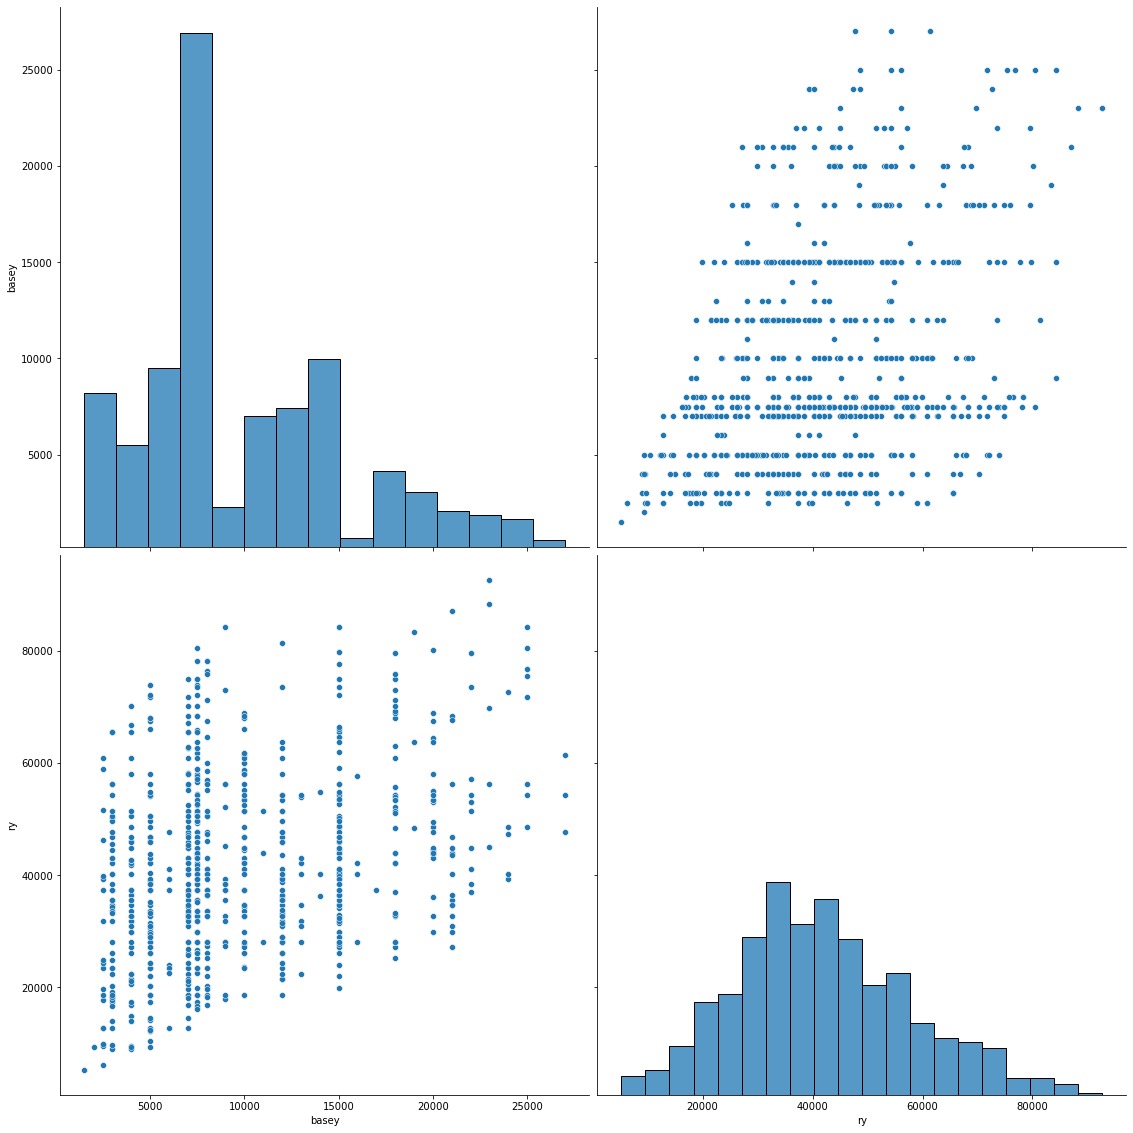

In [18]:
df_n = df[["basey", "ry"]]
sns.pairplot(df_n , height=8,)

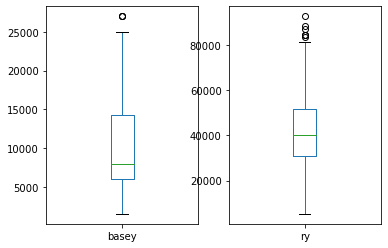

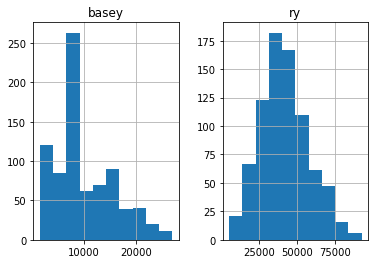

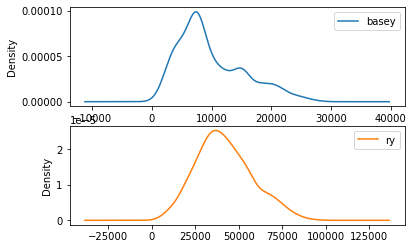

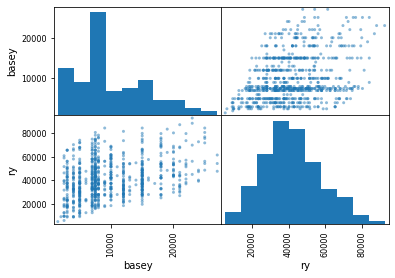

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas.plotting import scatter_matrix
df_n.plot(kind="box", subplots=True) 
plt.show()
df_n.hist()
plt.show()
df_n.plot(kind="density", subplots=True,sharex=False, sharey=False) 
plt.show()
scatter_matrix(df_n)
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='worl', ylabel='ry'>

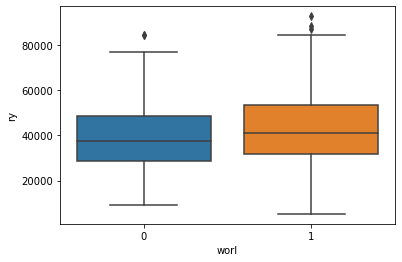

In [20]:
sns.boxplot(df['worl'],df['ry'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='worl', ylabel='basey'>

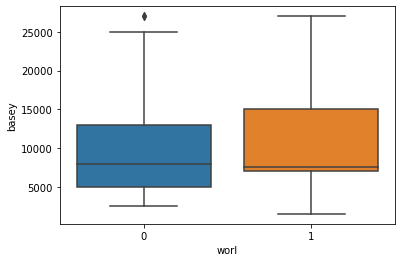

In [21]:
sns.boxplot(df['worl'],df['basey'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='worl', ylabel='ry'>

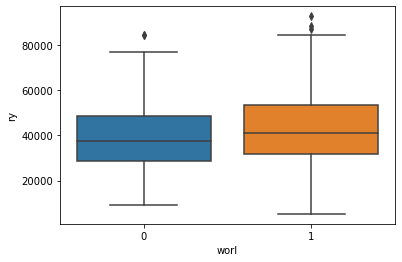

In [22]:
sns.boxplot(df['worl'],df['ry'])

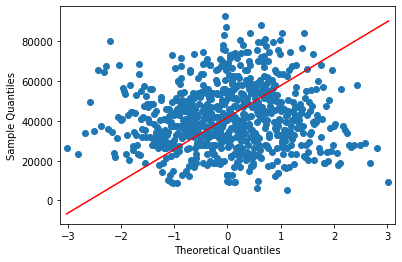

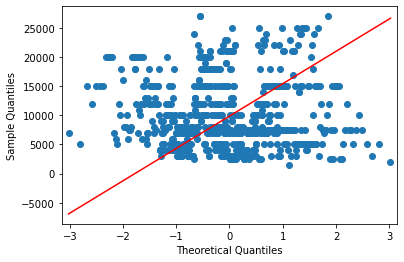

In [23]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
qqplot(df_n[["ry"]], line='s')
pyplot.show()
qqplot(df_n[["basey"]], line='s')
pyplot.show()

# Shapiro Test For Normal Distribution

In [24]:
from scipy.stats import shapiro
stat, p = shapiro(df_n["ry"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian')
else:
    print('Sample does not look Gaussian')

Statistics=0.986, p=0.000
Sample does not look Gaussian


# Control Group

In [25]:
control_grp= df[df.worl==0]
control_grp.columns
control_grp_f=control_grp.loc[:, ["basey", "ry"]]
control_grp_f

,basey,ry
75,4000,31824
76,4000,26208
77,4000,31824
78,9000,35568
79,3000,18050
...,...,...
754,18000,55786
755,24000,47362
756,5000,39312
757,15000,73570


# Treatment Group

In [26]:
treatment_grp= df[df.worl==1]
treatment_grp.columns
treatment_grp_f=treatment_grp.loc[:, ["basey", "ry"]]
treatment_grp_f

,basey,ry
0,7000,26208
1,5000,23400
2,15000,34164
3,12000,49608
4,15000,34819
...,...,...
795,7500,28080
796,5000,29016
797,3000,18720
798,5000,26208


# Baseline Income

In [27]:
import researchpy as rp
rp.ttest(group1= control_grp_f['basey'], group1_name= "cant_grp",
         group2= treatment_grp_f['basey'], group2_name= "treat_grp")

(    Variable      N         Mean           SD          SE    95% Conf.  \
 0   cant_grp  200.0  9947.500000  6033.074147  426.602764  9106.257888   
 1  treat_grp  600.0  9846.666667  5390.415865  220.062806  9414.478225   
 2   combined  800.0  9871.875000  5554.330267  196.375230  9486.402705   
 
        Interval  
 0  10788.742112  
 1  10278.855108  
 2  10257.347295  ,
                      Independent t-test   results
 0  Difference (cant_grp - treat_grp) =   100.8333
 1                 Degrees of freedom =   798.0000
 2                                  t =     0.2222
 3              Two side test p value =     0.8242
 4             Difference < 0 p value =     0.5879
 5             Difference > 0 p value =     0.4121
 6                          Cohen's d =     0.0181
 7                          Hedge's g =     0.0181
 8                      Glass's delta =     0.0167
 9                        Pearson's r =     0.0079)

# Endline Income

In [28]:
rp.ttest(group1= control_grp_f['ry'], group1_name= "cant_grp",
         group2= treatment_grp_f['ry'], group2_name= "treat_grp")

(    Variable      N          Mean            SD           SE     95% Conf.  \
 0   cant_grp  200.0  38997.515000  15001.647704  1060.776682  36905.709480   
 1  treat_grp  600.0  42665.626667  16292.709746   665.147090  41359.322846   
 2   combined  800.0  41748.598750  16049.402608   567.432071  40634.765081   
 
        Interval  
 0  41089.320520  
 1  43971.930487  
 2  42862.432419  ,
                      Independent t-test    results
 0  Difference (cant_grp - treat_grp) =  -3668.1117
 1                 Degrees of freedom =    798.0000
 2                                  t =     -2.8112
 3              Two side test p value =      0.0051
 4             Difference < 0 p value =      0.0025
 5             Difference > 0 p value =      0.9975
 6                          Cohen's d =     -0.2295
 7                          Hedge's g =     -0.2293
 8                      Glass's delta =     -0.2445
 9                        Pearson's r =      0.0990)

# Difference in Difference Model With Delta Y

In [29]:
df["y_delta"]=df['ry']-df["basey"]
import statsmodels.api as sm
y=df[["y_delta"]]
x=df[["worl", "nrega"]]
X1=sm.add_constant(x)
#Modelling using OLS least sqaure method
model=sm.OLS(y,X1)
fitted1=model.fit()
fitted1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_delta   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     13.45
Date:                Mon, 15 Nov 2021   Prob (F-statistic):           1.79e-06
Time:                        21:22:14   Log-Likelihood:                -8821.0
No. Observations:                 800   AIC:                         1.765e+04
Df Residuals:                     797   BIC:                         1.766e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.649e+04   1220.375     21.705      0.000    2.41e+04    2.89e+04
worl        3008.9712   1230.301      2.446      0.015     593.958    5423.984
nrega       4700.8689   1129.751      4.161      0.000    2483.230    6918.508
==============================================================================
Omnibus:                       32.435   Durbin-Watson:                   1.617
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.100
Skew:                           0.500   Prob(JB):                     2.39e-08
Kurtosis:                       2.767   Cond. No.                         4.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Simple Linear Model With Dependent Variable Not Delta but Simply a Variable

In [30]:
y_ry=df[["ry"]]
x_ry=df[["worl"]]
X1_ry=sm.add_constant(x)
#Modelling using OLS least sqaure method
model_ry=sm.OLS(y_ry,X1_ry)
fitted1_ry=model_ry.fit()
fitted1_ry.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ry   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     9.369
Date:                Mon, 15 Nov 2021   Prob (F-statistic):           9.51e-05
Time:                        21:22:14   Log-Likelihood:                -8872.1
No. Observations:                 800   AIC:                         1.775e+04
Df Residuals:                     797   BIC:                         1.776e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.685e+04   1300.866     28.325      0.000    3.43e+04    3.94e+04
worl        3030.1201   1311.446      2.311      0.021     455.824    5604.416
nrega       3946.3398   1204.264      3.277      0.001    1582.435    6310.244
==============================================================================
Omnibus:                       23.934   Durbin-Watson:                   1.711
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.641
Skew:                           0.435   Prob(JB):                     2.70e-06
Kurtosis:                       2.896   Cond. No.                         4.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""